<div style="text-align: center; background-color: lightblue; padding: 15px;">
    <p style="text-align: center;">بسم الله، والحمد لله، والصلاة والسلام على رسول الله وعلى آله وصحبه</p>
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
import cfgrib

<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> The gradient of temperature in the himesphere of winter is stronger  </h4>
</div>

In [3]:
data = xr.open_dataset("/home/muhammed/EHTP/LEARNING/PML/data.nc")
data

<xarray.Dataset> Size: 299MB
Dimensions:     (valid_time: 12, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 96B 2024-01-01 ... 2024-12-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 192B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 50MB ...
    v10         (valid_time, latitude, longitude) float32 50MB ...
    t2m         (valid_time, latitude, longitude) float32 50MB ...
    msl         (valid_time, latitude, longitude) float32 50MB ...
    sst         (valid_time, latitude, longitude) float32 50MB ...
    sp          (valid_time, latitude, longitude) float32 50MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-12T08:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
t2m = data["t2m"]
t2m_summer = t2m.isel(valid_time = np.arange(5,8)).mean(dim = "valid_time")
t2m_winter = t2m.isel(valid_time = [11,0,1]).mean(dim = "valid_time")
# the boreal summer and winter 

Text(0.5, 0.98, '2 METER TEMPERATURE (Kelvin) VISUALISATION ON BOREAL WINTER AND SUMMER ')

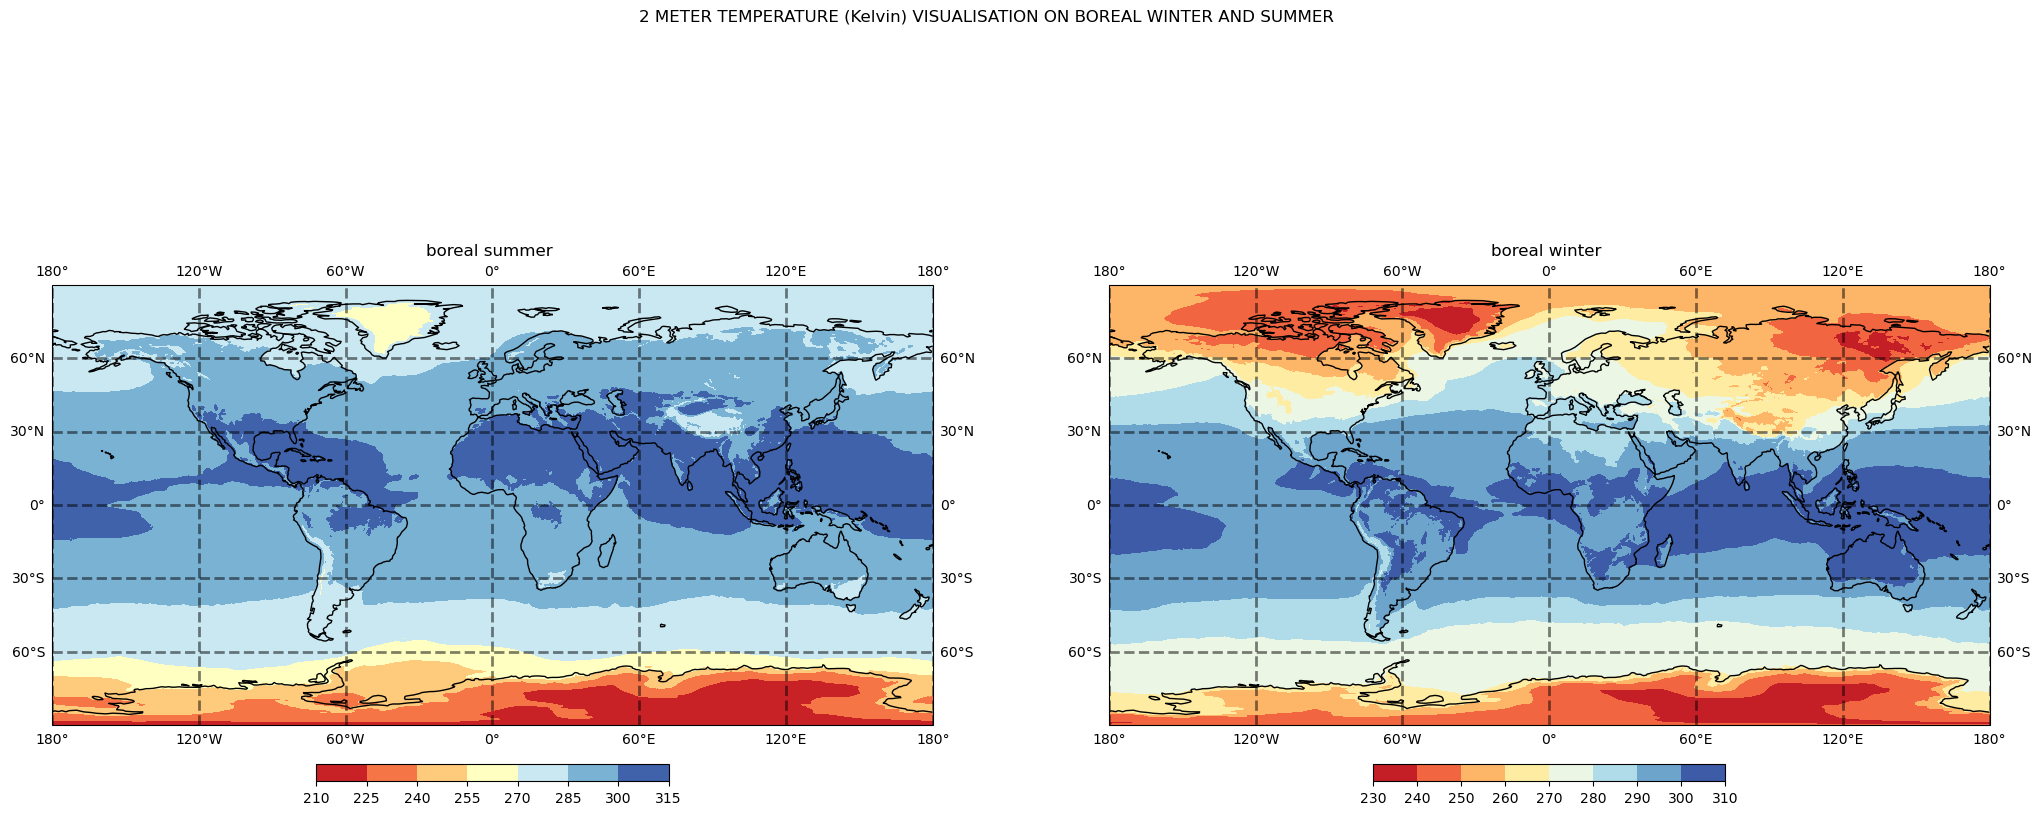

In [64]:
fig , ax = plt.subplots(figsize = (25,10) , ncols = 2 , subplot_kw= {"projection" : ccrs.PlateCarree()})
c1 = ax[0].contourf(t2m.longitude , t2m.latitude , t2m_summer , cmap = "RdYlBu")
ax[0].set_title("boreal summer ")
ax[0].coastlines(transform=ccrs.PlateCarree())
ax[0].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', 
    draw_labels=True, alpha=0.5, linestyle='--')
plt.colorbar(c1 , ax = ax[0], orientation="horizontal", shrink=0.4, pad=0.05)
c2 = ax[1].contourf(t2m.longitude , t2m.latitude , t2m_winter , cmap = "RdYlBu")
ax[1].set_title("boreal winter ")
ax[1].coastlines(transform=ccrs.PlateCarree())
ax[1].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', 
    draw_labels=True, alpha=0.5, linestyle='--')
plt.colorbar(c2 , ax = ax[1] , orientation="horizontal", shrink=0.4, pad=0.05)
plt.suptitle("2 METER TEMPERATURE (Kelvin) VISUALISATION ON BOREAL WINTER AND SUMMER ")


<div class="note" style="background-color: lightyellow; color: black; padding: 10px;">
  <h4> The Wind is easterly   </h4>
</div>

In [10]:
u = data["u10"].mean(dim = "valid_time")
v = data["v10"].mean(dim = "valid_time")
w = np.sqrt(u**2 + v**2)

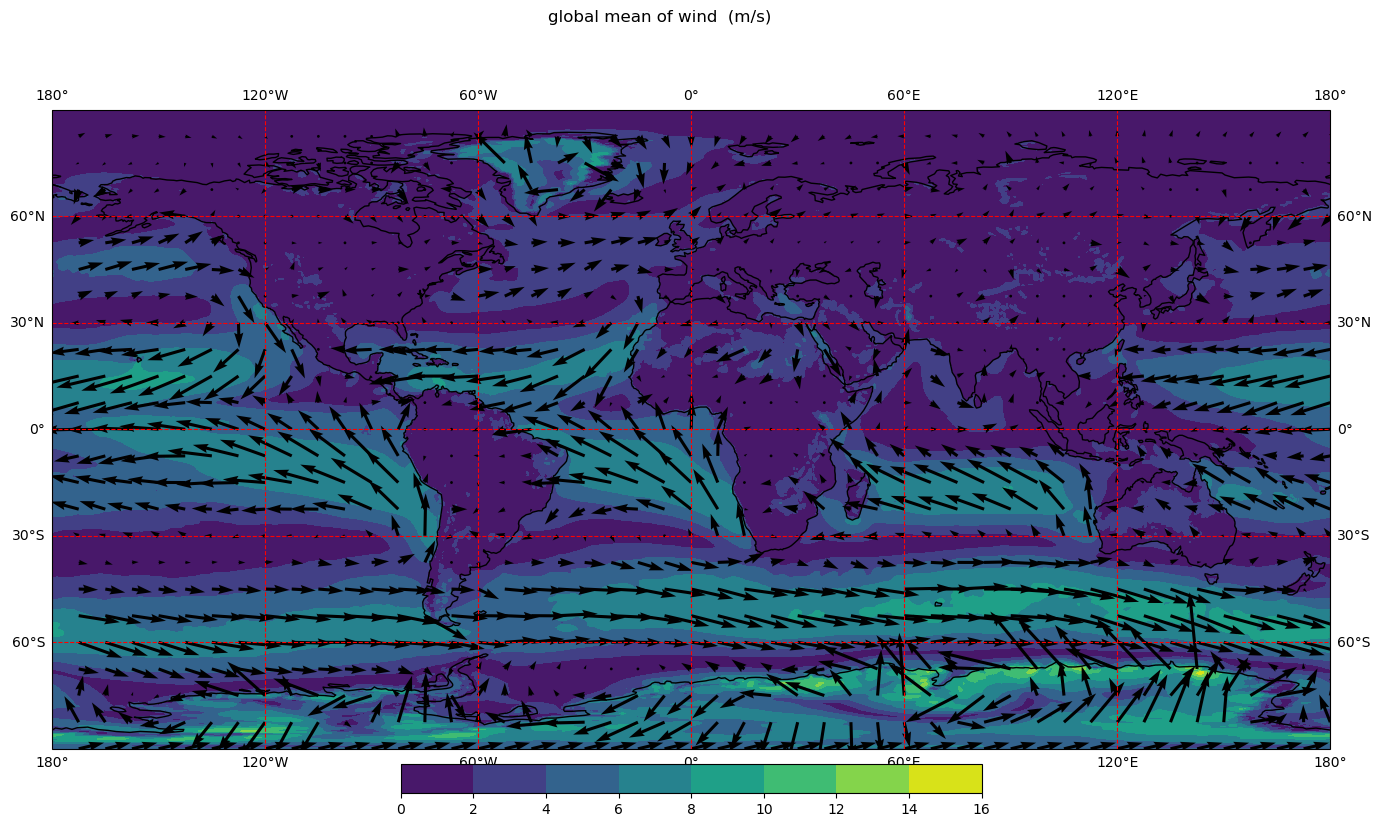

In [69]:
x = 30
y = 30
fig , ax = plt.subplots(figsize = (25,10) , subplot_kw = {"projection" : ccrs.PlateCarree()})
c3 = ax.contourf(u.longitude , u.latitude , w)
ax.quiver(u[::x , ::y].longitude , u[::x , ::y].latitude , u[::x , ::y] , v[::x , ::y])
ax.coastlines()
ax.gridlines(color = "red" , linestyle = "--" , draw_labels = True)
plt.suptitle("global mean of wind  (m/s)")
plt.colorbar(c3 , ax = ax , orientation = "horizontal" , pad = 0.02 , shrink = 0.3)